In [1]:
import pandas as pd 
from collections import Counter
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("netflix_reviews.csv")

In [3]:
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,5c934dd8-6417-4653-aa21-2d093f468d72,Redwane Stayka,Doesn't allow me to watch with my friend accou...,1,1,8.114.0 build 19 50680,2024-06-04 21:51:39,8.114.0 build 19 50680
1,1328c8fe-0596-41c6-9ddf-20a5163a5c50,vivian muir,i love this app everyone i know uses this app ...,5,0,8.117.0 build 3 50695,2024-06-04 21:50:37,8.117.0 build 3 50695
2,4ea3b37c-0478-4eb8-9754-7a27f917100c,Madongaolou Edward,My phone works fine with other apps but why th...,1,1,8.52.2 build 14 50335,2024-06-04 21:48:50,8.52.2 build 14 50335
3,7ecc7540-7968-4ba2-be6c-bdf3b0311daf,Stuart Durston,Netflix I would have once got a 5 star review....,2,0,8.117.0 build 3 50695,2024-06-04 21:39:35,8.117.0 build 3 50695
4,dd57e681-5ae5-4b41-909d-8a868fde751a,Afolayan Damilola,Good and amazing,5,0,NaN,2024-06-04 21:37:16,NaN
...,...,...,...,...,...,...,...,...
112108,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
112109,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
112110,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
112111,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346


In [4]:
def clean_text(text):
    if pd.isnull(text):
        return ''
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text

def tokenize_text(text):
    tokens = text.lower().split()
    return tokens

df['cleaned_content'] = df['content'].apply(clean_text)
df['tokens'] = df['cleaned_content'].apply(tokenize_text)

In [5]:
all_tokens = [token for sublist in df['tokens'] for token in sublist]
word_counts = Counter(all_tokens)

n = 10
top_n_words = word_counts.most_common(n)
print("Top {} Common Words or Phrases:".format(n))
for word, count in top_n_words:
    print("{}: {}".format(word, count))

Top 10 Common Words or Phrases:
the: 118696
i: 114679
to: 94504
and: 89770
it: 80282
is: 56860
a: 50570
netflix: 49251
app: 49149
my: 44719


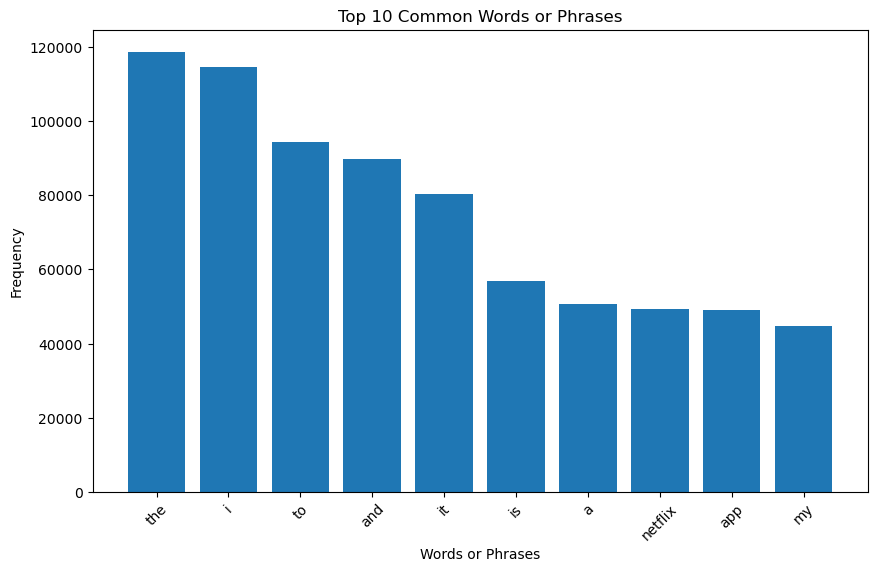

In [6]:
words, counts = zip(*top_n_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top {} Common Words or Phrases'.format(n))
plt.xlabel('Words or Phrases')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

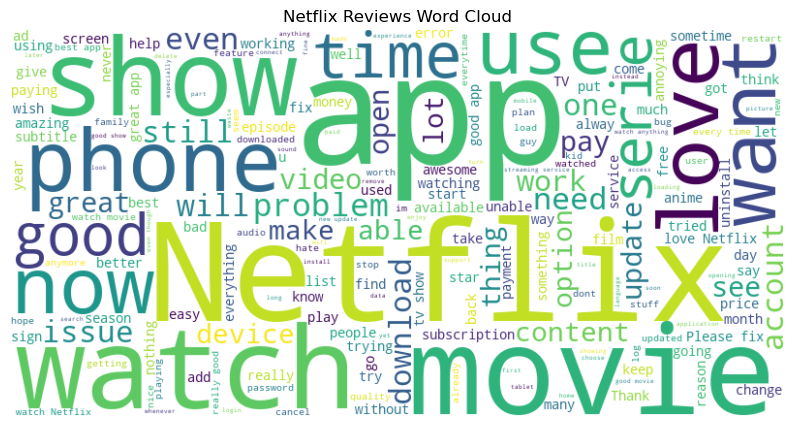

In [7]:
all_reviews = ' '.join(df['content'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Netflix Reviews Word Cloud')
plt.show()